<a href="https://colab.research.google.com/github/saurabhshinkar/BRS/blob/main/Book_Recommendation_System_Saurabh_Shinkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Book Recommendation System**

### <b> Problem Description </b>
###During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.


### In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
###Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

## <b> Data Description </b>

The Book-Crossing dataset comprises 3 files.

### <b>Users: </b>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

### <b>Books: </b> 
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S,Image-URL-M, Image-URL-L), i.e., small, medium large. These URLs point to the Amazon website.

### <b>Ratings: </b> 
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.




# **Importing** **Libraries**

In [1]:
#Import all library that will be used in entire project

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix,accuracy_score,f1_score,roc_curve, roc_auc_score,classification_report,precision_score, recall_score
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

# **Mount Drive And Import Data**

In [2]:
#Mount google drive for access of the play store dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
#Importing users data
File_path='/content/drive/MyDrive/Capstone Projects/Book Recommendation System/'
users= pd.read_csv(File_path + 'Users.csv')

#Importing books data
books= pd.read_csv(File_path + 'Books.csv')

#Importing ratings data
ratings= pd.read_csv(File_path + 'Ratings.csv')

In [22]:
# First Look 
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [21]:
# First Look 
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [23]:
# First Look 
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [17]:
#data information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [18]:
#data information
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [19]:
#data information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


# **Handling Missing Vaules**

**Users Dataset**

In [33]:
# Missing Value Count Function
def show_missing():
    missing = users.columns[users.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(users[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(users[show_missing()].isnull().sum().sort_values(ascending = False)/len(users)*100,2))

Missing Data Count
Age    110762
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Age    39.72
dtype: float64


In [34]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

minimum age 0 and max age 244? so outliers exist in age

In [36]:
users.Age.value_counts()

24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
168.0       1
132.0       1
159.0       1
186.0       1
127.0       1
Name: Age, Length: 165, dtype: int64

In [43]:
users[users['Age']>100 ].value_counts().sum()

366

In [45]:
users[users['Age']<10].value_counts().sum()

1069

Text(0.5, 1.0, 'Distribution Plot Of Age')

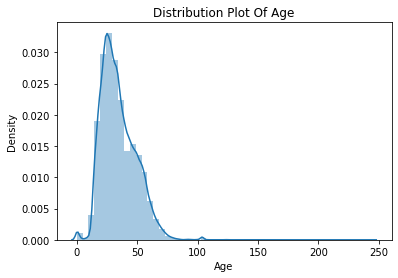

In [12]:
#Distribution Plot Of Age
sns.distplot(users.Age)
plt.title('Distribution Plot Of Age')

Age is positively skewed.
Median imputation is preferable for skewed distribution(be it right or left). 
So we will replace nulls with medianin Age column.

In [13]:
#median of Age
users.Age.median()

32.0

In [14]:
#Fill NaN Values in Age Column with Median
users['Age'] =users['Age'].fillna(users['Age'].median())

**Books Dataset**

In [25]:
# Missing Value Count Function
def show_missing():
    missing = books.columns[books.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(books[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(books[show_missing()].isnull().sum().sort_values(ascending = False)/len(books)*100,2))

Missing Data Count
Image-URL-L    3
Publisher      2
Book-Author    1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Image-URL-L    0.0
Publisher      0.0
Book-Author    0.0
dtype: float64


**Ratings Dataset**

In [26]:
# Missing Value Count Function
def show_missing():
    missing = ratings.columns[ratings.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(ratings[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(ratings[show_missing()].isnull().sum().sort_values(ascending = False)/len(ratings)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


# **Data Preparation**

Merging users and ratings dataset on User-ID column

In [28]:
#Merging both data 
data_users_ratings=pd.merge(users,ratings, on='User-ID')

Merging combined data of users and ratings on ISBN column

In [30]:
#Merging both data
merged=pd.merge(books,data_users_ratings, on='ISBN')

In [31]:
#info
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Location             1031136 non-null  object 
 10  Age                  753301 non-null   float64
 11  Book-Rating          1031136 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB
